In [1]:
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.regularizers import l2
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Defining the parameters
# batch, classes, epochs
batch_size = 128
num_classes = 10
epochs = 25

In [3]:
# Splitting the data between train and test
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

input_shape = (x_train.shape[1:] + (1,)) # (28, 28, 1)


4423680/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


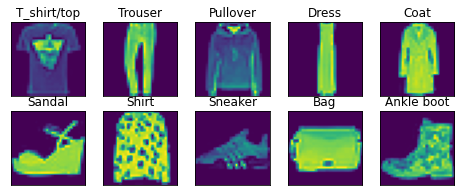

In [4]:
# plotting some random 10 images

class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num,::])
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [5]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
# Printing sample data
print(y_train[:10])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [7]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [8]:
# summary of the model
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0

In [9]:
# compile
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the input image
x_train /= 255
x_test /= 255


In [10]:
# Training the model
history = model.fit(np.expand_dims(x_train, -1), y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_split=0.3,
              shuffle=True)

Epoch 1/25
329/329 [==============================] - 463s 1s/step - loss: 9.0550 - accuracy: 0.7346 - val_loss: 9.2667 - val_accuracy: 0.5443
Epoch 2/25
329/329 [==============================] - 465s 1s/step - loss: 7.7520 - accuracy: 0.8191 - val_loss: 7.2529 - val_accuracy: 0.8233
Epoch 3/25
329/329 [==============================] - 464s 1s/step - loss: 6.7899 - accuracy: 0.8426 - val_loss: 6.3181 - val_accuracy: 0.8607
Epoch 4/25
329/329 [==============================] - 464s 1s/step - loss: 5.9678 - accuracy: 0.8584 - val_loss: 5.5437 - val_accuracy: 0.8811
Epoch 5/25
329/329 [==============================] - 464s 1s/step - loss: 5.2564 - accuracy: 0.8685 - val_loss: 4.9241 - val_accuracy: 0.8686
Epoch 6/25
329/329 [==============================] - 462s 1s/step - loss: 4.6361 - accuracy: 0.8739 - val_loss: 4.3851 - val_accuracy: 0.8626
Epoch 7/25
329/329 [==============================] - 462s 1s/step - loss: 4.0903 - accuracy: 0.8817 - val_loss: 3.8983 - val_accuracy: 0.8619

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


KeyError: ignored

313/313 [==============================] - 24s 76ms/step - loss: 0.5853 - accuracy: 0.9196
Test Accuracy : 0.920


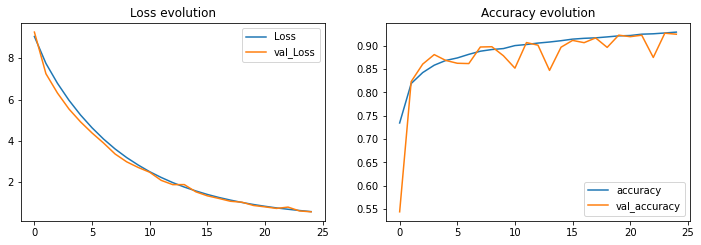

In [12]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

evaluation = model.evaluate(np.expand_dims(x_test, -1), y_test)
print(f'Test Accuracy : {evaluation[1]:.3f}')
